#**스마트폰 센서 데이터 기반 모션 분류**
# 단계2 : 기본 모델링


## 0.미션3

* 데이터 전처리
    * 가변수화, 데이터 분할, NaN 확인 및 조치, 스케일링 등 필요한 전처리 수행
* 다양한 딥러닝 구조의 모델로 분류 모델 생성
    * 최소 4개 이상 모델링 수행
    * 각 모델별 최소 5회 반복수행해서 얻은 성능의 평균으로 비교
    * 각 모델의 성능을 저장하는 별도 데이터 프레임을 만들고 비교
* 옵션 : 다음 사항은 선택사항입니다. 시간이 허용하는 범위 내에서 수행하세요.
    * 상위 N개 변수를 선정하여 모델링 및 성능 비교
        * 모델링에 항상 모든 변수가 필요한 것은 아닙니다.
        * 변수 중요도 상위 N개를 선정하여 모델링하고 타 모델과 성능을 비교하세요.
        * 상위 N개를 선택하는 방법은, 변수를 하나씩 늘려가며 모델링 및 성능 검증을 수행하여 적절한 지점을 찾는 것입니다.
* 성능 가이드
    * Accuracy : 0.90 ~ 0.99

## 1.환경설정

* 세부 요구사항
    - 경로 설정 : 구글콜랩
        * 구글 드라이브 바로 밑에 project3 폴더를 만들고,
        * 데이터 파일을 복사해 넣습니다.
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다.
        * 필요하다고 판단되는 라이브러리를 추가하세요.


### (1) 경로 설정

* 구글 드라이브 연결

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
path = '/content/drive/MyDrive/project3/'

### (2) 라이브러리 불러오기

* 라이브러리 로딩
     - pandas, numpy,matplotlib,seaborn, joblib, 모델링에 필요한 라이브러리를 로딩합니다.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import joblib
from tqdm import tqdm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import *

from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Input
from keras.backend import clear_session
from keras.optimizers import Adam

In [4]:
# 학습곡선 함수
def dl_history_plot(history):
    plt.figure(figsize=(10,6))
    plt.plot(history['loss'], label='train_err', marker = '.')
    plt.plot(history['val_loss'], label='val_err', marker = '.')

    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid()
    plt.show()

### (3) 데이터 불러오기

* 주어진 데이터셋
    * data01_train.csv : 학습 및 검증용
    * data01_test.csv : 테스트용
    * feature.csv : feature 이름을 계층구조로 정리한 데이터

* 세부 요구사항
    * 칼럼 삭제 : data01_train.csv와 data01_test.csv 에서 'subject' 칼럼은 불필요하므로 삭제합니다.

#### 1) 데이터로딩

In [5]:
# 주어진 데이터 셋을 불러오세요.(3개)

In [6]:
#불필요한 칼럼을 삭제하세요.

In [7]:
data01_train = pd.read_csv(path + 'data01_train.csv')
data01_test = pd.read_csv(path + 'data01_test.csv')
features = pd.read_csv(path + 'features.csv')

data01_train = data01_train.drop('subject', axis=1)
data01_test = data01_test.drop('subject', axis=1)

#### 2) 기본 정보 조회

In [8]:
#전체 데이터의 행,열 개수 확인
print("data01_train :", data01_train.shape)
print("features :", features.shape)

data01_train : (5881, 562)
features : (561, 4)


In [9]:
#전체 데이터의 상위 5개 행 확인
print(data01_train.head(5))
print(features.head(5))

   tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.288508          -0.009196          -0.103362         -0.988986   
1           0.265757          -0.016576          -0.098163         -0.989551   
2           0.278709          -0.014511          -0.108717         -0.997720   
3           0.289795          -0.035536          -0.150354         -0.231727   
4           0.394807           0.034098           0.091229          0.088489   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.962797         -0.967422         -0.989000         -0.962596   
1         -0.994636         -0.987435         -0.990189         -0.993870   
2         -0.981088         -0.994008         -0.997934         -0.982187   
3         -0.006412         -0.338117         -0.273557          0.014245   
4         -0.106636         -0.388502         -0.010469         -0.109680   

   tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  fBodyBodyGyr

In [10]:
#전체 데이터의 수치형 변수 분포 확인
print(data01_train.describe())

       tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
count        5881.000000        5881.000000        5881.000000   
mean            0.274811          -0.017799          -0.109396   
std             0.067614           0.039422           0.058373   
min            -0.503823          -0.684893          -1.000000   
25%             0.262919          -0.024877          -0.121051   
50%             0.277154          -0.017221          -0.108781   
75%             0.288526          -0.010920          -0.098163   
max             1.000000           1.000000           1.000000   

       tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
count       5881.000000       5881.000000       5881.000000       5881.000000   
mean          -0.603138         -0.509815         -0.604058         -0.628151   
std            0.448807          0.501815          0.417319          0.424345   
min           -1.000000         -0.999844         -0.999667         -1.000000   


In [11]:
#전체 데이터의 모든 변수 확인
print(data01_train.columns)

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-skewness()', 'fBodyBodyGyroJerkMag-kurtosis()',
       'angle(tBodyAccMean,gravity)', 'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'Activity'],
      dtype='object', length=562)


## **2. 데이터 전처리**

* 가변수화, 데이터 분할, NaN 확인 및 조치, 스케일링 등 필요한 전처리를 수행한다.


### (1) 데이터 분할1 : x, y

* 세부 요구사항
    - x, y로 분할합니다.

In [12]:
# 데이터 분할을 합니다.
target = 'Activity'
x = data01_train.drop(target, axis=1)
y = data01_train[target]

x_train, x_val, y_train, y_val = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y
)

### (2) 스케일링


* 세부 요구사항
    - 스케일링을 필요로 하는 알고리즘 사용을 위해서 코드 수행
    - min-max 방식 혹은 standard 방식 중 한가지 사용.

In [13]:
#스케일링 방식을 선택해서 스케일링을 진행합니다.
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_val_scaled = scaler.transform(x_val)

### (3) Y 전처리
* integer encoding : LabelEncoder
* (필요시) one-hot encoding

In [14]:
# 정수 인코딩 변환(LabelEncoder)
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_val_encoded = encoder.transform(y_val)
original_labels = encoder.classes_

In [15]:
# 기존 레이블 저장
labels = encoder.classes_

### (4) 데이터분할2 : train, validation

* 세부 요구사항
    - train : val = 8 : 2 혹은 7 : 3
    - random_state 옵션을 사용하여 다른 모델과 비교를 위해 성능이 재현되도록 합니다.

In [16]:
#데이터 분할 진행(train:val = 8:2 혹은 7:3 권장)
target = 'Activity'
x = data01_train.drop(target, axis=1)
y = data01_train[target]
x_train, x_val, y_train, y_val = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y)

## **3. 기본 모델링**



* 세부 요구사항
    - 모델1 : Base line 모델
        * Hidden Layer 없이 모델 생성
    - 모델2 : 복잡한 모델 생성
        * 최소 5개 이상의 은닉층을 추가한 모델
    - 모델3 ~ n : 튜닝 모델
        * 학습률, epoch 등 조정
        * 모델2에 과적합을 방지하기 위한 규제 기법 추가
        * Accuracy 최대화 시키는 모델 생성하기
    - (옵션) 각 모델은 최소 5번 반복수행해서 얻은 성능의 평균값을 기록

### (1) 모델1 : Hidden Layer 없이 모델 생성

In [17]:
import tensorflow as tf

# 모델 설계
n_feature = x_train_scaled.shape[1]
n_class = len(original_labels)

model1 = tf.keras.models.Sequential([
    Input(shape=(n_feature,)),
    Dense(n_class, activation='softmax')
])

In [18]:
# 컴파일 및 학습
model1.compile(loss='sparse_categorical_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])

history1 = model1.fit(x_train_scaled,
                      y_train_encoded,
                      epochs=10,
                      validation_data=(x_val_scaled, y_val_encoded))

Epoch 1/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5339 - loss: 1.2743 - val_accuracy: 0.8216 - val_loss: 0.7524
Epoch 2/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8402 - loss: 0.6933 - val_accuracy: 0.8726 - val_loss: 0.5589
Epoch 3/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8732 - loss: 0.5212 - val_accuracy: 0.8845 - val_loss: 0.4622
Epoch 4/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8935 - loss: 0.4334 - val_accuracy: 0.8828 - val_loss: 0.3986
Epoch 5/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9032 - loss: 0.3659 - val_accuracy: 0.8955 - val_loss: 0.3564
Epoch 6/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9087 - loss: 0.3308 - val_accuracy: 0.8963 - val_loss: 0.3316
Epoch 7/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9218 - loss: 0.2952 - val_accuracy: 0.9065 - val_loss: 0.3054
Epoch 8/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9266 - loss: 0.2726 - val_accuracy: 0.

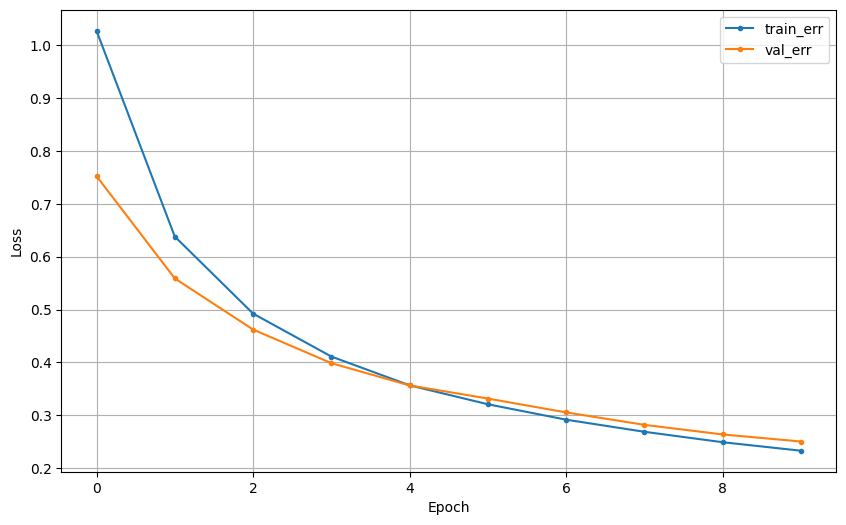

In [19]:
# 학습곡선
dl_history_plot(history1.history)

In [20]:
# 예측 및 평가
y_pred1 = model1.predict(x_val_scaled)
y_pred1_classes = np.argmax(y_pred1, axis=1)
accuracy1 = accuracy_score(y_val_encoded, y_pred1_classes)
print(f"Model 1 Accuracy: {accuracy1}")

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Model 1 Accuracy: 0.9243840271877655


In [21]:
#(옵션) 모델1번을 최소 5번 반복수행해서 얻은 성능의 평균값을 기록해보자!
accuracies = []
for i in range(5):  # 5번 반복
    # 모델 학습
    history1 = model1.fit(x_train_scaled, y_train_encoded, epochs=10, validation_data=(x_val_scaled, y_val_encoded), verbose=0)  # verbose=0으로 학습 과정 출력 생략

    # 예측
    y_pred1 = model1.predict(x_val_scaled)
    y_pred1_classes = np.argmax(y_pred1, axis=1)

    # 정확도 계산 및 저장
    accuracy1 = accuracy_score(y_val_encoded, y_pred1_classes)
    accuracies.append(accuracy1)
    print(f"{i+1}: Model 1 정확도: {accuracy1}")

# 평균 정확도 계산 및 출력
mean_accuracy = np.mean(accuracies)
print(f"평균 정확도 (5회): {mean_accuracy}")

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1: Model 1 정확도: 0.9532710280373832
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2: Model 1 정확도: 0.9634664401019541
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
3: Model 1 정확도: 0.9685641461342396
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4: Model 1 정확도: 0.9745114698385726
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
5: Model 1 정확도: 0.9762107051826678
평균 정확도 (5회): 0.9672047578589634


### (2) 모델2 : 최소 5개 이상의 은닉층을 추가한 모델

In [22]:
# 모델 설계
model2 = tf.keras.models.Sequential([
    Input(shape=(n_feature,)),
    Dense(128, activation='relu'),  # 1st hidden layer
    Dense(64, activation='relu'),   # 2nd hidden layer
    Dense(32, activation='relu'),   # 3rd hidden layer
    Dense(16, activation='relu'),   # 4th hidden layer
    Dense(8, activation='relu'),    # 5th hidden layer
    Dense(n_class, activation='softmax')  # Output layer
])

In [23]:
# 컴파일 및 학습
model2.compile(loss='sparse_categorical_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])

history2 = model2.fit(x_train_scaled,
                      y_train_encoded,
                      epochs=10,
                      validation_data=(x_val_scaled, y_val_encoded))

Epoch 1/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.3873 - loss: 1.3784 - val_accuracy: 0.7655 - val_loss: 0.5216
Epoch 2/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8342 - loss: 0.4168 - val_accuracy: 0.9031 - val_loss: 0.2461
Epoch 3/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9259 - loss: 0.2184 - val_accuracy: 0.9286 - val_loss: 0.1971
Epoch 4/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9251 - loss: 0.1783 - val_accuracy: 0.9346 - val_loss: 0.1849
Epoch 5/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9450 - loss: 0.1419 - val_accuracy: 0.9601 - val_loss: 0.1179
Epoch 6/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9618 - loss: 0.0982 - val_accuracy: 0.9473 - val_loss: 0.1311
Epoch 7/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9539 - loss: 0.1247 - val_accuracy: 0.9626 - val_loss: 0.1051
Epoch 8/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9552 - loss: 0.1153 - val_accuracy: 0

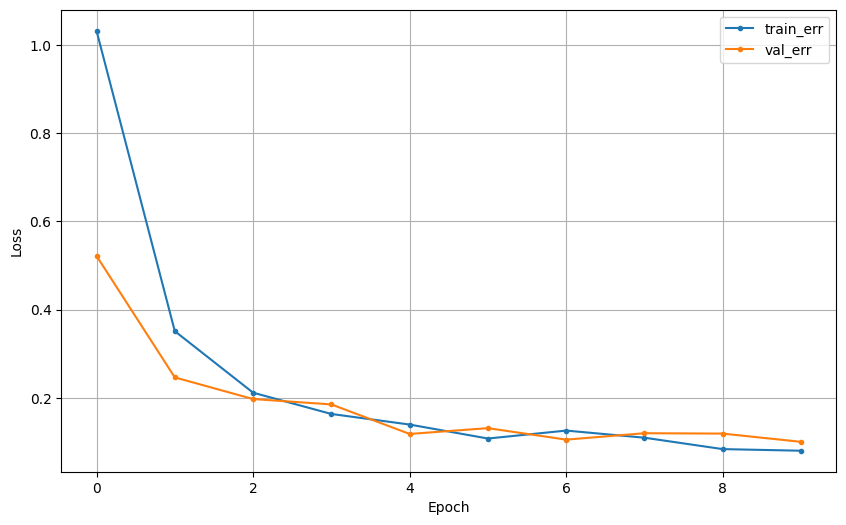

In [24]:
# 학습곡선
dl_history_plot(history2.history)

In [25]:
# 예측 및 평가
y_pred2 = model2.predict(x_val_scaled)
y_pred2_classes = np.argmax(y_pred2, axis=1)
accuracy2 = accuracy_score(y_val_encoded, y_pred2_classes)
print(f"Model 2 Accuracy: {accuracy2}")

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Model 2 Accuracy: 0.967714528462192


### (3) 모델3 : 학습률, epoch 등 조정

In [26]:
# 모델 설계
model3 = tf.keras.models.Sequential([
    Input(shape=(n_feature,)),
    Dense(128, activation='relu'),  # 1st hidden layer
    Dense(64, activation='relu'),   # 2nd hidden layer
    Dense(32, activation='relu'),   # 3rd hidden layer
    Dense(16, activation='relu'),   # 4th hidden layer
    Dense(8, activation='relu'),    # 5th hidden layer
    Dense(n_class, activation='softmax')  # Output layer
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

In [27]:
# 컴파일 및 학습
model3.compile(loss='sparse_categorical_crossentropy',
               optimizer=optimizer,
               metrics=['accuracy'])

history3 = model3.fit(x_train_scaled,
                      y_train_encoded,
                      epochs=30,
                      validation_data=(x_val_scaled, y_val_encoded))

Epoch 1/30
147/147 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.1785 - loss: 1.6597 - val_accuracy: 0.4528 - val_loss: 1.3978
Epoch 2/30
147/147 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5654 - loss: 1.2904 - val_accuracy: 0.6585 - val_loss: 1.0581
Epoch 3/30
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7205 - loss: 0.9876 - val_accuracy: 0.7664 - val_loss: 0.8222
Epoch 4/30
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7695 - loss: 0.7877 - val_accuracy: 0.7782 - val_loss: 0.6652
Epoch 5/30
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7768 - loss: 0.6307 - val_accuracy: 0.7901 - val_loss: 0.5420
Epoch 6/30
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8036 - loss: 0.5113 - val_accuracy: 0.8343 - val_loss: 0.4495
Epoch 7/30
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8703 - loss: 0.4178 - val_accuracy: 0.8929 - val_loss: 0.3617
Epoch 8/30
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9066 - loss: 0.3315 - val_accuracy: 0.

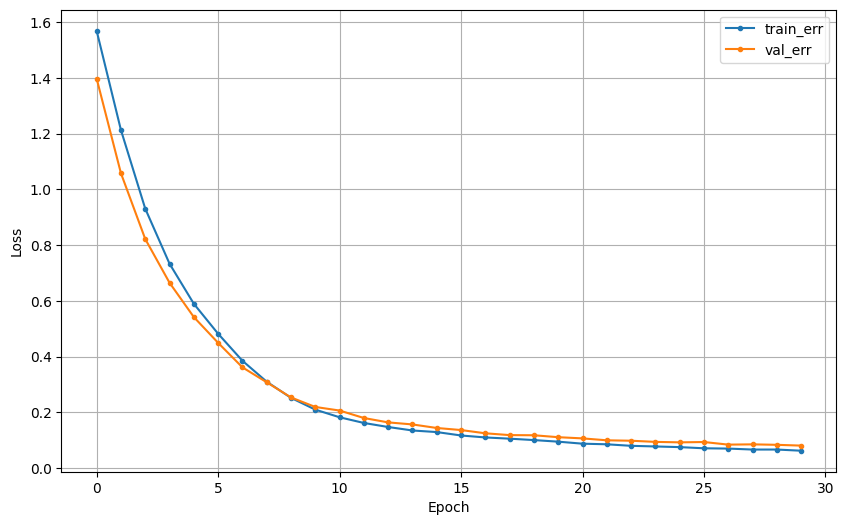

In [28]:
# 학습곡선
dl_history_plot(history3.history)

In [29]:
# 예측 및 평가
y_pred3 = model3.predict(x_val_scaled)
y_pred3_classes = np.argmax(y_pred3, axis=1)
accuracy3 = accuracy_score(y_val_encoded, y_pred3_classes)
print(f"Model 3 Accuracy: {accuracy3}")

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Model 3 Accuracy: 0.9745114698385726


### (4) 모델4 :  학습률, epoch 등 조정

In [30]:
model4 = tf.keras.models.Sequential([
    Input(shape=(n_feature,)),
    Dense(128, activation='relu'),  # 1st hidden layer
    Dense(64, activation='relu'),   # 2nd hidden layer
    Dense(32, activation='relu'),   # 3rd hidden layer
    Dense(16, activation='relu'),   # 4th hidden layer
    Dense(8, activation='relu'),    # 5th hidden layer
    Dense(n_class, activation='softmax')  # Output layer
])
optimizer = tf.keras.optimizers.Adam(learning_rate=0.00005)

In [31]:
# 컴파일 및 학습
model4.compile(loss='sparse_categorical_crossentropy',
               optimizer=optimizer,
               metrics=['accuracy'])

history4 = model4.fit(x_train_scaled,
                      y_train_encoded,
                      epochs=50,
                      validation_data=(x_val_scaled, y_val_encoded))

Epoch 1/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.2873 - loss: 1.7622 - val_accuracy: 0.4163 - val_loss: 1.5787
Epoch 2/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4026 - loss: 1.5421 - val_accuracy: 0.4588 - val_loss: 1.4597
Epoch 3/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.4499 - loss: 1.4272 - val_accuracy: 0.4673 - val_loss: 1.3580
Epoch 4/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4807 - loss: 1.3145 - val_accuracy: 0.4851 - val_loss: 1.2626
Epoch 5/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5062 - loss: 1.2207 - val_accuracy: 0.5489 - val_loss: 1.1543
Epoch 6/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5955 - loss: 1.0835 - val_accuracy: 0.6398 - val_loss: 0.9848
Epoch 7/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6664 - loss: 0.9279 - val_accuracy: 0.7018 - val_loss: 0.8592
Epoch 8/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6995 - loss: 0.8074 - val_accuracy: 0.

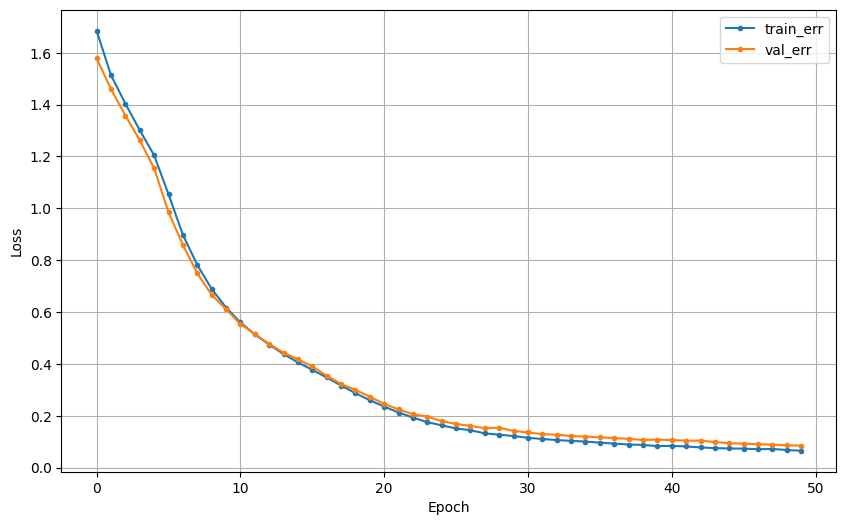

In [32]:
# 학습곡선
dl_history_plot(history4.history)

In [33]:
# 예측 및 평가
y_pred4 = model4.predict(x_val_scaled)
y_pred4_classes = np.argmax(y_pred4, axis=1)
accuracy4 = accuracy_score(y_val_encoded, y_pred4_classes)
print(f"Model 4 Accuracy: {accuracy4}")

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Model 4 Accuracy: 0.9745114698385726


## 4.성능비교

* 세부 요구사항
    - test 데이터에 대한 전처리
    - 각 모델에 대해서 test 데이터로 성능 측정

In [34]:
#전체 데이터 불러오기(test)
data01_test = pd.read_csv(path + 'data01_test.csv')

# subject 삭제
data01_test = data01_test.drop('subject', axis=1)

# x, y 분할
x_test = data01_test.drop(target, axis=1)
y_test = data01_test[target]

# x : 스케일링 적용
x_test_scaled = scaler.transform(x_test)

# y : 정수인코딩 적용
y_test_encoded = encoder.transform(y_test)

In [35]:
# test 데이터에 대한 성능 측정
models = [model1, model2, model3, model4]
model_names = ['Model 1', 'Model 2', 'Model 3', 'Model 4']

results = []
for model, model_name in zip(models, model_names):
    y_pred = model.predict(x_test_scaled)
    y_pred_classes = np.argmax(y_pred, axis=1)
    accuracy = accuracy_score(y_test_encoded, y_pred_classes)
    results.append([model_name, accuracy])

# 결과 출력
print("테스트 데이터 성능 비교:")
for model_name, accuracy in results:
    print(f"{model_name}: Accuracy = {accuracy:.4f}")

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
테스트 데이터 성능 비교:
Model 1: Accuracy = 0.9701
Model 2: Accuracy = 0.9551
Model 3: Accuracy = 0.9653
Model 4: Accuracy = 0.9626


#### 고생하셨습니다! 이제 단계적 모델링을 해봅시다.